In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.legend import Legend
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import pandas as pd
import seaborn as sns

from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes

mpl.style.use('default')
%matplotlib inline

In [2]:
# setting
headers_bs = ['$0$']
headers_size = ['${}$'.format(i) for i in range(1, 23)]

DATA_DIR = 'data/ensembling/'
FIG_DIR = 'figs/ensembling/'

In [47]:
# plot setting
plt_setting = {
    'figure.figsize':(5, 5),
    'legend.fontsize': 30, #'xx-large',
    'axes.labelsize': 30, #'xx-large',
    'axes.titlesize': 24, #'xx-large',
    'xtick.labelsize': 30, #'xx-large',
    'ytick.labelsize': 30, #'xx-large',
}

#SIZE	UM	ATHENA	PGD-ADT	ED_NM	ED_ERR	ER_WST	ER_BST	TEST_AVE	TEST_MED	TEST_BST	TEST_WST

edgecolors = ['#3F7F4C', 'blue', 'magenta',]
facecolors = ['#7EFF99', 'blue', 'magenta']

# linestyles = [ ':', ':', ':', '-', '--', '-.', ':']
# linecolors = ['#AA00AA', '#CC0044', '#0044CC', '#00CC44', '#88BB00', '#BB3333', '#FF00BB', '#9F83C3']
# CURVES = ['SIZE', 'ATHENA', 'PGD-ADT', 'TEST_MED', 'ED_NM', 'ED_ERR', 'ER_WST', 'ER_BST']
linestyles = ['--', '-', ':', '-.', '-.']
linecolors = ['orange', 'lightseagreen', 'blue', 'magenta', 'moccasin',]
CURVES = ['SIZE', 'PGD-ADT', 'DIVERSE-AVEO', 'SHIFT-AVEO', 'ROTATE-AVEO']
LEGENDS = ['Size', 'PGD-ADT', 'Diverse', 'Shift', 'Rotate']
VARS_DIVERSE = ['SIZE', 'DIVERSE-BEST', 'DIVERSE-WORST',]
VARS_SHIFT = ['SIZE', 'SHIFT-BEST', 'SHIFT-WORST',]
VARS_ROTATE = ['SIZE', 'ROTATE-BEST', 'ROTATE-WORST',]

ATTACKS = [
    'biml2_eps0.125',
    'bimli_eps0.0075',
    'cwl2_lr0.007',
    'fgsm_eps0.005',
    'jsma_theta0.25gamma0.05',
    'pgd_eps0.005',
]

titles = [
    'BIM_$l_2(\epsilon:0.125)$',
    'BIM_$l_\infty(\epsilon:0.0075)$',
    'CW$(lr:0.007)$',
    'FGSM$(\epsilon:0.005)$',
    'JSMA$(\\theta:0.25,\gamma:0.05)$',
    'PGD$(\epsilon:0.005)$',
]

In [50]:
def _get_data(attack, strategy='aveo'):
    file_name = os.path.join(DATA_DIR, 'plot-ensembling-{}-{}.csv'.format(strategy, attack))
    df = pd.read_csv(file_name)
    
    df_curves = df[CURVES]
    df_var_diverse = df[VARS_DIVERSE]
    df_var_shift = df[VARS_SHIFT]
    df_var_rotate = df[VARS_ROTATE]
    
#     print(df.head(2))
    return df_curves, df_var_diverse, df_var_shift, df_var_rotate

def plot_curves(attacks, nrows=2, ncols=3, prefix='ensembling-aveo-', fill_var=True,
               show_title=True, legend=True, save=False):
    fig, axs = plt.subplots(nrows, ncols, sharex=True, sharey=False, figsize=(24, 6))
    sns.set(rc=plt_setting)
    sns.set_style("ticks")
    
    for i, ax in enumerate(axs.flat):
        if i >= len(attacks):
            break
        df_data, df_var_div, df_var_shift, df_var_rotate = _get_data(attacks[i])
        df_data = df_data[CURVES]
        
        lines = ax.plot(df_data[CURVES[0]], df_data[CURVES[1:]])
        
        ax.xaxis.set_major_locator(MultipleLocator(3))
        ax.yaxis.set_minor_locator(MultipleLocator(0.05))
        ax.tick_params(which='both', width=2)    
        ax.grid(which='major', linestyle='-.', linewidth='0.4', color='gray')
        ax.grid(which='minor', linestyle='-.', linewidth='0.2', color='gray')
        for j, l in enumerate(ax.lines):
            plt.setp(l, linewidth=5, linestyle=linestyles[j], color=linecolors[j])

        if fill_var:
            ax.fill_between(df_var_div[VARS_DIVERSE[0]], df_var_div[VARS_DIVERSE[1]], 
                            df_var_div[VARS_DIVERSE[2]],
                            linestyle='-', edgecolor=edgecolors[0], linewidth=1,
                            facecolor=facecolors[0], alpha=0.2, antialiased=True)
            ax.fill_between(df_var_shift[VARS_SHIFT[0]], df_var_shift[VARS_SHIFT[1]], 
                            df_var_shift[VARS_SHIFT[2]],
                            linestyle='-', edgecolor=edgecolors[1], linewidth=12,
                            facecolor=facecolors[1], alpha=0.2, antialiased=True)
            ax.fill_between(df_var_rotate[VARS_ROTATE[0]], df_var_rotate[VARS_ROTATE[1]], 
                            df_var_rotate[VARS_ROTATE[2]],
                            linestyle='-', edgecolor=edgecolors[2], linewidth=12,
                            facecolor=facecolors[2], alpha=0.2, antialiased=True)
            
        if show_title:
            delta = nrows*ncols - len(attacks)
            ax.set_title(titles[i + delta])
        
        if i % ncols == 0:
            ax.set_ylabel('error rate')
#         if (ncols > 2 and i == (ncols + 1)) or (i >= ncols):
        if i == 2:
            ax.set_xlabel('# of weak defenses')
    
    for ax in fig.axes:
        plt.sca(ax)
        plt.yticks(rotation=90)
    
    fig.legend(lines, LEGENDS[1:],
                loc='upper center', ncol=7, framealpha=0.2, handletextpad=0.3,
                bbox_to_anchor=(0.45, 1.01), borderaxespad=0.1, columnspacing=0.8)
    fig.tight_layout(rect=[0, 0, .9, 0.95])
    fig.subplots_adjust(wspace=0.27, hspace=0.01)
    
    
    if save:
        save_file = '{}-cifar100-part.pdf'.format(prefix)
        plt.savefig(os.path.join(FIG_DIR, save_file), dpi=1200,
                    bbox_inches='tight', transparent=False)
    

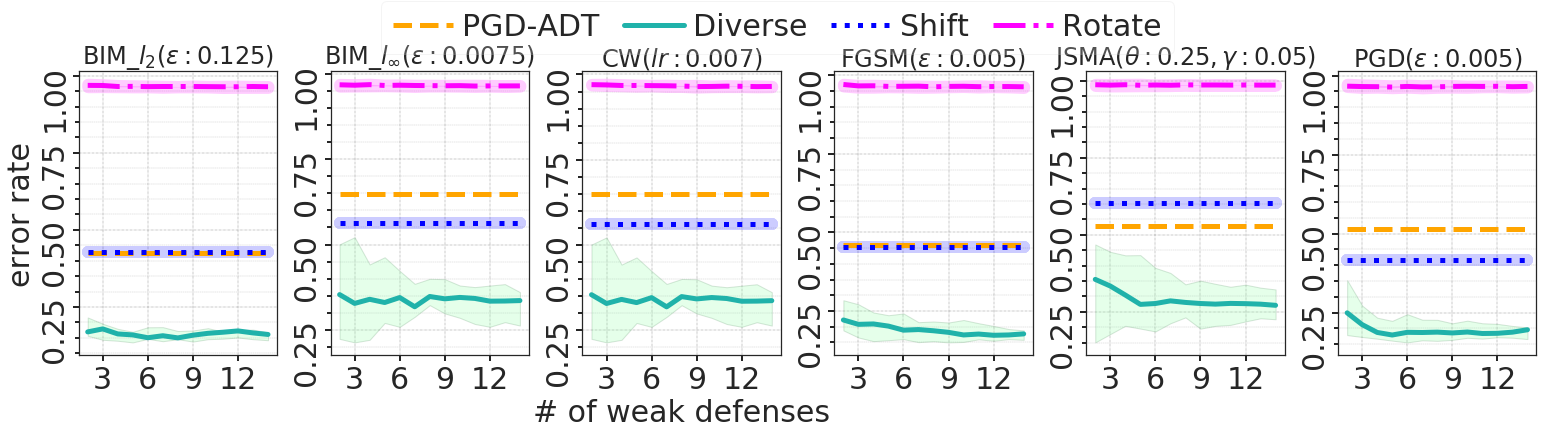

In [51]:
plot_curves(attacks=ATTACKS,
            nrows=1, ncols=6, 
            prefix='ensembling-aveo', 
            fill_var=True, 
            show_title=True, 
            legend=True, 
            save=True)

In [33]:
# setting
DATA_DIR = 'data/ensembling/'
FIG_DIR = 'figs/ensembling/'
FIG_DIR = 'figs/ensembling/'

DIVERSE_DATA_DIR = 'data/diversity/'
DIV_FIG_DIR = 'figs/diversity/'
DIVERSE_PREFIX = 'diversity-error'


# plot setting
plt_setting = {
    'figure.figsize':(5, 5),
    'legend.fontsize': 23, #'xx-large',
    'axes.labelsize': 24, #'xx-large',
    'axes.titlesize': 20, #'xx-large',
    'xtick.labelsize': 20, #'xx-large',
    'ytick.labelsize': 20, #'xx-large',
}

#SIZE	UM	ATHENA	PGD-ADT	ED_NM	ED_ERR	ER_WST	ER_BST	TEST_AVE	TEST_MED	TEST_BST	TEST_WST

edgecolors = ['#3F7F4C', 'blue', 'magenta', 'gray']
facecolors = ['#7EFF99', 'blue', 'magenta', 'gray']

# linestyles = [ ':', ':', ':', '-', '--', '-.', ':']
# linecolors = ['#AA00AA', '#CC0044', '#0044CC', '#00CC44', '#88BB00', '#BB3333', '#FF00BB', '#9F83C3']
# CURVES = ['SIZE', 'ATHENA', 'PGD-ADT', 'TEST_MED', 'ED_NM', 'ED_ERR', 'ER_WST', 'ER_BST']
linestyles = ['-', '--', ':', '-.', '-.']
linecolors = ['lightseagreen', 'orange','blue', 'magenta', 'gray']
CURVES_DIVERSE = ['SIZE', 'DIVERSE-MEAN', 'SHIFT-MEAN', 'ROTATE-MEAN']
VARS_DIVERSE_LIB = ['SIZE', 'DIVERSE-BEST', 'DIVERSE-WORST',]
VARS_SHIFT_LIB = ['SIZE', 'SHIFT-BEST', 'SHIFT-WORST',]
VARS_ROTATE_LIB = ['SIZE', 'ROTATE-BEST', 'ROTATE-WORST',]

DATA_CURVES = ['SIZE', 'DIVERSE-MEAN', 'DIVERSE-BEST', 'DIVERSE-WORST',]

ATTACKS = [
    'biml2_eps0.125',
    'bimli_eps0.0075',
    'cwl2_lr0.007',
    'fgsm_eps0.005',
    'jsma_theta0.25gamma0.05',
    'pgd_eps0.005',
]

titles = [
    'BIM_$l_2(\epsilon:0.125)$',
    'BIM_$l_\infty(\epsilon:0.0075)$',
    'CW$(lr:0.007)$',
    'FGSM$(\epsilon:0.005)$',
    'JSMA$(\\theta:0.25,\gamma:0.05)$',
    'PGD$(\epsilon:0.005)$',
]

In [7]:
def _get_data2(attack, data_dir, data_prefix, strategy='aveo'):
    file_name = os.path.join(data_dir, '{}-{}-{}.csv'.format(data_prefix, strategy, attack))
    df = pd.read_csv(file_name)
    df_curves = df[DATA_CURVES]
    return df_curves


def plot_curves2(attacks, data_dir, data_prefix, 
                 nrows=2, ncols=3, 
                 fig_prefix='dual-ensembling-aveo-', 
                 fill_var=True, show_title=True, 
                 legend=True, save=False):
    fig, axs = plt.subplots(nrows, ncols, sharex=True, sharey=False, figsize=(18, 12))
    sns.set(rc=plt_setting)
    sns.set_style("ticks")
    
    for i, ax in enumerate(axs.flat):
        if i >= len(attacks):
            break
        df_data = _get_data2(attacks[i], data_dir, data_prefix)      
        lines = ax.plot(df_data[DATA_CURVES[0]], df_data[DATA_CURVES[1:]])
        
        ax.xaxis.set_major_locator(MultipleLocator(2))
        ax.xaxis.set_minor_locator(MultipleLocator(1))         
        ax.yaxis.set_major_locator(MultipleLocator(500))
        ax.tick_params(which='both', width=2)    
        ax.grid(which='major', linestyle='-.', linewidth='0.4', color='gray')
        ax.grid(which='minor', linestyle='-.', linewidth='0.2', color='gray')
        for j, l in enumerate(ax.lines):
            plt.setp(l, linewidth=5, linestyle=linestyles[j], color=linecolors[j])
    
        if show_title:
            delta = nrows*ncols - len(attacks)
            ax.set_title(titles[i + delta])
            
        
        ax2 = ax.twinx()
        df_error, df_errvar_div, _, _ = _get_data(attacks[i])
        
        lines += ax2.plot(df_error[CURVES[0]], df_error[CURVES[2]])
        ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#         ax2.yaxis.set_major_locator(MultipleLocator(0.05))
        ax2.yaxis.set_minor_locator(AutoMinorLocator())
#         if i in [1, 2, 4]:
#             ax2.yaxis.set_major_locator(MultipleLocator(0.075))
#         elif i in [0, 3]:
#             ax2.yaxis.set_major_locator(MultipleLocator(0.03))
#         else:
#             ax2.yaxis.set_major_locator(MultipleLocator(0.05))
#         ax2.grid(which='major', linestyle='-.', linewidth='0.4', color='gray')
#         ax2.grid(which='minor', linestyle='-.', linewidth='0.2', color='gray')
        for j, l in enumerate(ax2.lines):
            plt.setp(l, linewidth=5, linestyle=linestyles[-1], color=linecolors[-1])

        if fill_var:
            ax2.fill_between(df_errvar_div[VARS_DIVERSE[0]], df_errvar_div[VARS_DIVERSE[1]], 
                            df_errvar_div[VARS_DIVERSE[2]],
                            linestyle='-', edgecolor=edgecolors[-1], linewidth=2,
                            facecolor=facecolors[-1], alpha=0.2, antialiased=True)
        
        if i % ncols == 0:
            ax.set_ylabel('diversity')
            
        if i % ncols == (ncols-1):
            ax2.set_ylabel('error rate', va="bottom", rotation=270)
            
        if i == 4:
            ax.set_xlabel('# of weak defenses')
    
    for ax in fig.axes:
        plt.sca(ax)
        plt.yticks(rotation=90)
    
    fig.legend(lines, ['diversity(mean)', 'diversity(best)', 
                       'diversity(worst)', 'error rate'], 
                loc='upper center', ncol=4, framealpha=0.2, handletextpad=0.5,
                bbox_to_anchor=(0.45, 1.), borderaxespad=0.5, columnspacing=0.8)
    fig.tight_layout(rect=[0, 0, .9, 0.95])
    fig.subplots_adjust(wspace=0.3, hspace=0.15)
    
    
    if save:
        save_file = '{}-cifar100.pdf'.format(fig_prefix)
        plt.savefig(os.path.join(FIG_DIR, save_file), dpi=1200,
                    bbox_inches='tight', transparent=False)
    

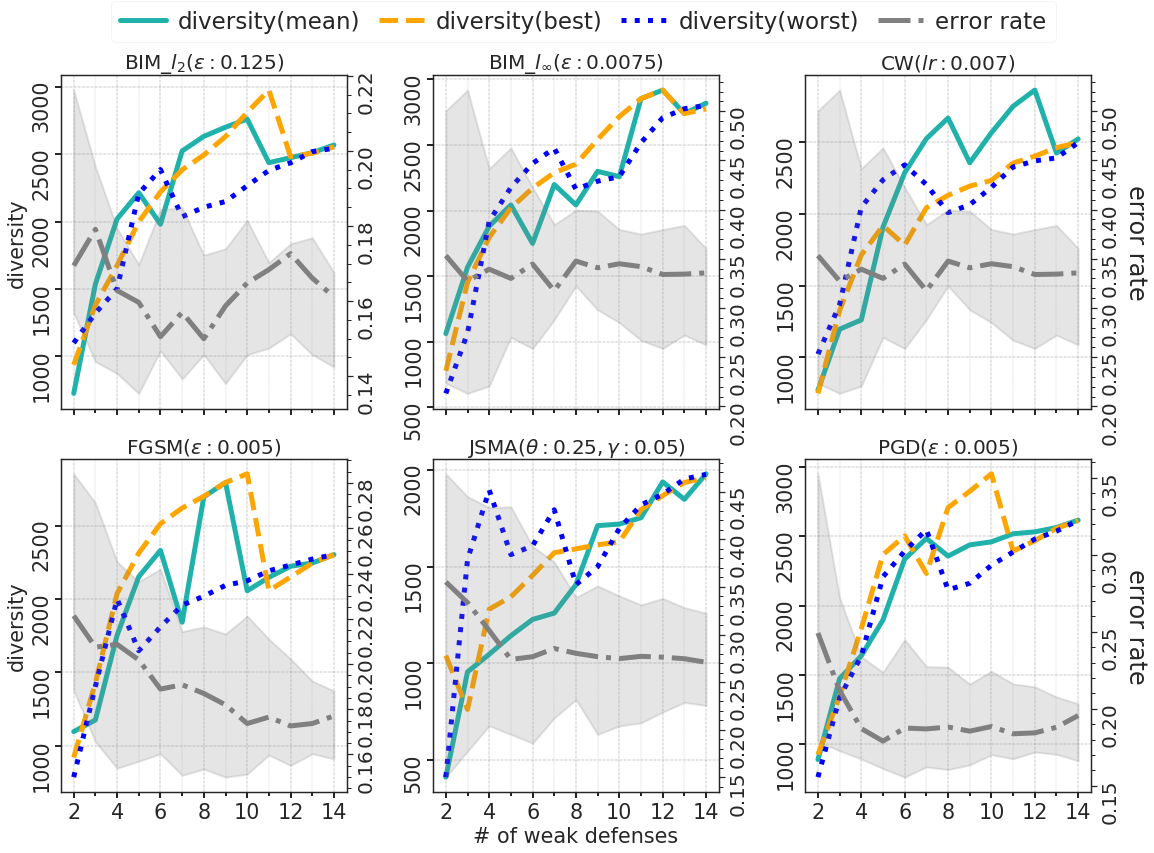

In [8]:
plot_curves2(attacks=ATTACKS,
            nrows=2, ncols=3,
             data_dir=DIVERSE_DATA_DIR,
             data_prefix=DIVERSE_PREFIX,
            fig_prefix='dual-ensembling-aveo', 
            fill_var=True, 
            show_title=True, 
            legend=True, 
            save=False)

In [9]:
# plot setting
plt_setting = {
    'figure.figsize':(10, 10),
    'legend.fontsize': 32, #'x-large',
    'axes.labelsize': 45, #'xx-large',
    'axes.titlesize': 'xx-large',
    'xtick.labelsize': 40, #'xx-large',
    'ytick.labelsize': 40, #'xx-large',
}

linestyles = ['-', '--', ':', '-.']
# linestyles = ['-', '--', ':']
linecolors = ['#3F7F4C', '#CC0044', '#4444EE', '#DDA044',]
# linecolors = ['#3F7F4C', '#CC0044', '#4444EE',]
edgecolors = ['#3F7F4C', '#CC0044', '#4444EE',]
facecolors = ['#7EFF99', '#FF0088', '#8800FF']

# curves_avep = ['Diverse-AVEO', 'Shift-AVEO', 'PGD-ADT', 'UM']
# curves_avep = ['Diverse-AVEO', 'Shift-AVEO', 'Rotate-AVEO', 'PGD-ADT',]
curves_avep = ['Diverse-AVEO', 'Shift-AVEO', 'PGD-ADT',]
variances_all = ['Diverse-Min', 'Diverse-Max']
variances_shift = ['Shift-Min', 'Shift-Max']
variances_rotate = ['Rotate-Min', 'Rotate-Max']
curves_t2mv = ['Diverse-T2MV', 'Shift-T2MV', 'UM',]

In [10]:
def _get_data(attack, curves, strategy='aveo'):
    file_name = os.path.join(DATA_DIR, 'plot-ensembling-{}-{}.csv'.format(strategy, attack))
    df = pd.read_csv(file_name)
    
    df_curves = df[['Size'] + curves]
    
    print(df_curves.head())
    return df, df_curves


def plot_curve(attack, curves, strategy='aveo',
               loc=[0.145, 0.18, 0.845, 0.27], xlim=(0, 73), ylim=(-0.01, 0.1),
               prefix='ensembling_', legend_anchor=(1.0, 0.72),
               fill_var=True, zoom=False, show_title=False, legend=True, save=False):    
    df_data, df_curves = _get_data(attack, curves, strategy)
    
    sns.set(rc=plt_setting)
    sns.set_style("ticks")
    plot = df_curves.set_index('Size').plot()
    plot.xaxis.set_minor_locator(AutoMinorLocator())
    plot.yaxis.set_minor_locator(AutoMinorLocator())
    plot.tick_params(which='both', width=2)    
    plot.grid(which='major', linestyle='-.', linewidth='0.3', color='lightgray')
#     plot.grid(which='minor', linestyle='-.', linewidth='0.1', color='gray')
    
    for i, l in enumerate(plot.lines):
        plt.setp(l, linewidth=8, linestyle=linestyles[i], color=linecolors[i])
    
    if legend:
        lgd = plot.legend(loc='right', ncol=1, framealpha=0.3, handletextpad=0.2,
#                           bbox_to_anchor=legend_anchor, 
#                            bbox_to_anchor=(0.5, 1.01), 
                          borderaxespad=0.0, columnspacing=0.1)
    
    if fill_var:
        plot.fill_between(df_data['Size'], df_data[variances_all[0]], df_data[variances_all[1]],
                         linestyle=linestyles[0], edgecolor=edgecolors[0], linewidth=5,
                          facecolor=facecolors[0], alpha=0.2, antialiased=True)
        plot.fill_between(df_data['Size'], df_data[variances_shift[0]], df_data[variances_shift[1]],
                         linestyle=linestyles[1], edgecolor=edgecolors[1], linewidth=5,
                          facecolor=facecolors[1], alpha=0.2, antialiased=True)
#         plot.fill_between(df_data['Size'], df_data[variances_rotate[0]], df_data[variances_rotate[1]],
#                          linestyle=linestyles[2], edgecolor=edgecolors[2], linewidth=5,
#                           facecolor=facecolors[2], alpha=0.2, antialiased=True)
    
    
    if zoom:
        # zoom in
        axins = plot.inset_axes(loc)
        zoom_data = df_data
        axins.plot(df_data.set_index('Dataset'), alpha=0.7)
                
        lines = axins.lines
        for i in range(len(lines)):
            lines[i].set_linestyle(linestyles[i])
            lines[i].set_color(linecolors[i])
            lines[i].set_linewidth(3)
            
        axins.grid(which='major', linestyle=':', linewidth='0.5', color='navy')

        axins.set_xlim(xlim)
        axins.set_ylim(ylim)
        axins.set_xticklabels('')
        axins.set_yticklabels('')
        plot.indicate_inset_zoom(axins)
        axins.set_facecolor('whitesmoke')
        axins.set_alpha(0.2)
        mark_inset(plot, axins, loc1=2, loc2=4, fc="lightyellow")#, ec="0.8", alpha=0.3)
        
    if show_title:
        plot.set_title(attack)
        
    plot.set_ylabel('error rate')
    plot.set_xlabel('# of weak defenses')
    
    if save:
        attack = attack.replace('.', '')
        plt.savefig(os.path.join(FIG_DIR, '{}{}-{}_cifar100.pdf'.format(prefix, strategy, attack)), dpi=1200,
                       bbox_inches='tight', transparent=False)

In [11]:
plot_curve(
    'biml2_eps0.125', 
    curves=curves_avep,
    ylim=(0, 0.024), 
#     prefix='motiv_', 
    zoom=False, 
#     legend=False, 
    legend_anchor=(1.0, 0.7),
    show_title=False,
    save=True
)

KeyError: "['Diverse-AVEO', 'Size', 'Shift-AVEO'] not in index"

In [ ]:
plot_curve(
    'bimli_eps0.0075', 
    curves=curves_avep,
    ylim=(0, 0.024), 
#     prefix='motiv_', 
    zoom=False, 
#     legend=False, 
    legend_anchor=(1.0, 0.7),
    show_title=False,
    save=True
)

In [ ]:
plot_curve(
    'cwl2_lr0.007', 
    curves=curves_avep,
    ylim=(0, 0.024), 
#     prefix='motiv_', 
    zoom=False, 
#     legend=False, 
    legend_anchor=(1.0, 0.76),
    show_title=False,
    save=True
)

In [ ]:
plot_curve(
    'fgsm_eps0.005', 
    curves=curves_avep,
    ylim=(0, 0.024), 
#     prefix='motiv_', 
    zoom=False, 
#     legend=False, 
    legend_anchor=(1.0, 0.76),
    show_title=False,
    save=True
)

In [ ]:
plot_curve(
    'jsma_theta0.25gamma0.05', 
    curves=curves_avep,
    ylim=(0, 0.024), 
#     prefix='motiv_', 
    zoom=False, 
#     legend=False, 
    legend_anchor=(1.0, 0.76),
    show_title=False,
    save=True
)

In [ ]:
plot_curve(
    'pgd_eps0.005', 
    curves=curves_avep,
    ylim=(0, 0.024), 
#     prefix='motiv_', 
    zoom=False, 
#     legend=False, 
    legend_anchor=(1.0, 0.76),
    show_title=False,
    save=True
)